<a href="https://colab.research.google.com/github/RehanShabbir16/Modern_computer_vision_with_pytorch/blob/main/KMNIST_in__pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import torch
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
device= "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
data=datasets.KMNIST(root='./data',download=True)


100%|██████████| 18165135/18165135 [00:13<00:00, 1339753.12it/s]


Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 29497/29497 [00:00<00:00, 185995.80it/s]


Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 3041136/3041136 [00:04<00:00, 614137.69it/s]


Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 5120/5120 [00:00<00:00, 15438415.87it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



In [4]:
train_x=data.data
train_y=data.targets

In [5]:
classes = [
    "お",  # o
    "き",  # ki
    "す",  # su
    "つ",  # tsu
    "な",  # na
    "は",  # ha
    "ま",  # ma
    "や",  # ya
    "れ",  # re
    "を"   # wo
]

In [21]:
train_y.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
print(classes)

['お', 'き', 'す', 'つ', 'な', 'は', 'ま', 'や', 'れ', 'を']


<Figure size 1000x1000 with 0 Axes>

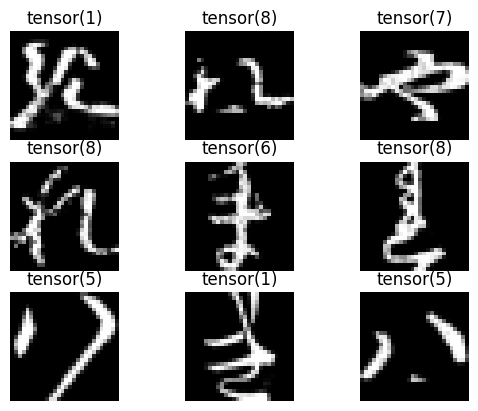

In [42]:
plt.figure(figsize=(10,10))
plt.subplots(3,3)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(train_x))
  plt.imshow(train_x[num], cmap='gray')
  plt.title(train_y[num])
  plt.axis('off')

In [43]:
train_x.shape

torch.Size([60000, 28, 28])

In [44]:
class KMNISTDataset(Dataset):
  def __init__(self,x,y):
    x=x/255
    x=x.view(-1,28*28)
    self.x=x
    self.y=y
  def __len__(self):
    return len(self.x)
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]

In [45]:
def get_data():
  data_load=KMNISTDataset(train_x,train_y)
  train_loader=DataLoader(data_load,batch_size=32,shuffle=True)
  return train_loader

In [46]:
def get_model():
  model=nn.Sequential(
      nn.Linear(28*28,128),
      nn.ReLU(),
      nn.Linear(128,10),
  ).to(device)
  loss_fn=nn.CrossEntropyLoss()
  optimizer=optim.Adam(model.parameters(),lr=0.001)
  return model,loss_fn,optimizer

In [47]:
def train_batch(model,loss_fn,optimizer,x,y):
  model.train()
  pred=model(x)
  loss=loss_fn(pred,y)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  return loss.item()

In [48]:
@torch.no_grad()
def model_accuracy(x,y,model):
  """
  args:
    x:x
    y:y
    model: model
  returns:
  accuracy
  """
  model.eval()
  pred=model(x)
  max_values, argmaxes=pred.max(-1)
  is_correct=argmaxes==y
  return is_correct.cpu().numpy().tolist()

In [49]:

@torch.no_grad()
def val_loss(x,y,model):
  model.eval()
  pred=model(x)
  loss=loss_fn(pred,y)
  return loss.item()

In [50]:
trn_dl=get_data()
model,loss_fn,optimizer=get_model()

In [51]:
losses,accuracies=[],[]
for epoch in range(10):
  print(epoch)
  epoch_losses, epoch_acc=[],[]
  for ix, batch in enumerate(iter(trn_dl)):
    x,y=batch
    batch_loss=train_batch(model,loss_fn,optimizer,x.to(device),y.to(device))
    epoch_losses.append(batch_loss)
  train_epoch_loss = np.array(epoch_losses).mean()

  for ix, batch in enumerate(iter(trn_dl)):
      x, y = batch
      is_correct = model_accuracy(x, y, model)
      epoch_acc.extend(is_correct)
  train_epoch_accuracy = np.mean(epoch_acc)
  losses.append(train_epoch_loss)
  accuracies.append(train_epoch_accuracy)

0
1
2
3
4
5
6
7
8
9


In [54]:
losses

[0.43913091856042547,
 0.2119994565476974,
 0.15198856870159508,
 0.11491020411538581,
 0.08993697135212521,
 0.0703296852208674,
 0.057208752748121816,
 0.04646658497552077,
 0.03638367421811757,
 0.031146228126871088]

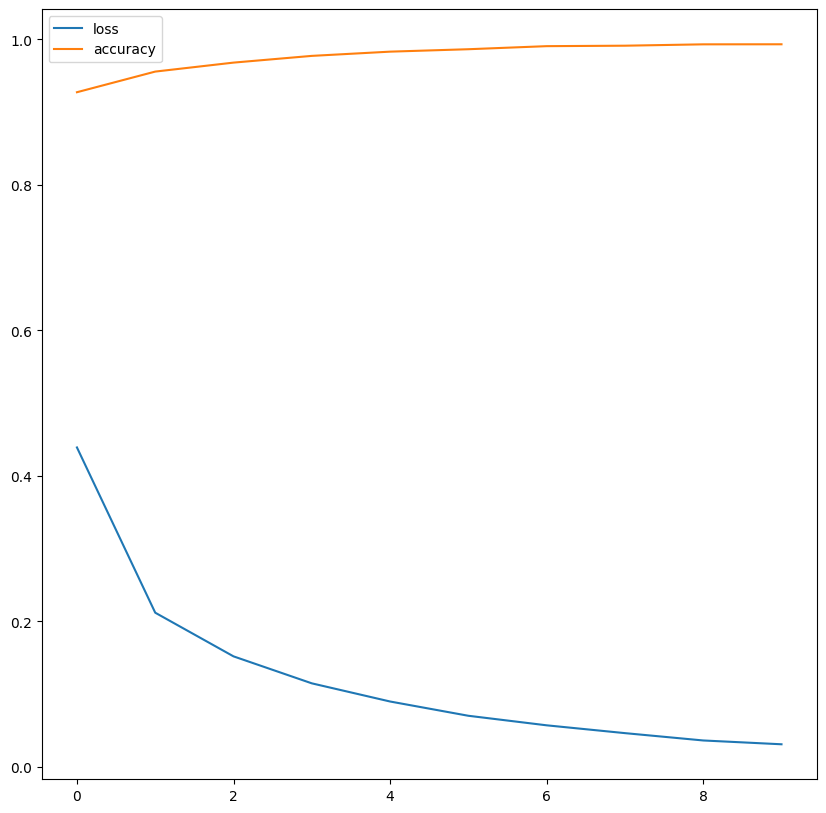

In [55]:
plt.figure(figsize=(10,10))
plt.plot(losses,label='loss')
plt.plot(accuracies,label='accuracy')
plt.legend()